# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
! pip install citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        response = requests.get(city_url).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | half moon bay
Processing Record 2 of Set 1 | talcahuano
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | bang rakam
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | mastic beach
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | thaba-tseka
Processing Record 12 of Set 1 | berlevag
Processing Record 13 of Set 1 | talnakh
Processing Record 14 of Set 1 | vao
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | taoudenni
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | fougamou
Processing Record 20 of Set 1 | srednekolymsk
Processing Record 21 of Set 1 | tayu
Processing Record 22 of S

Processing Record 37 of Set 4 | east london
Processing Record 38 of Set 4 | coihaique
Processing Record 39 of Set 4 | port blair
Processing Record 40 of Set 4 | rio gallegos
Processing Record 41 of Set 4 | yarmouth
Processing Record 42 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 4 | ambilobe
Processing Record 44 of Set 4 | tevriz
Processing Record 45 of Set 4 | talas
Processing Record 46 of Set 4 | ishigaki
Processing Record 47 of Set 4 | ilebo
Processing Record 48 of Set 4 | general roca
Processing Record 49 of Set 4 | fort nelson
Processing Record 0 of Set 5 | provideniya
Processing Record 1 of Set 5 | linqing
Processing Record 2 of Set 5 | the valley
Processing Record 3 of Set 5 | slonim
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | haines junction
Processing Record 6 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 7 of Set 5 | mocambique
City not found. Skipping...
Processing Record 8 of Set 5 | klaksvik
Processing

Processing Record 29 of Set 8 | sovetskiy
Processing Record 30 of Set 8 | ronne
Processing Record 31 of Set 8 | troitskoye
Processing Record 32 of Set 8 | townsville
Processing Record 33 of Set 8 | samusu
City not found. Skipping...
Processing Record 34 of Set 8 | rancho palos verdes
Processing Record 35 of Set 8 | constitucion
Processing Record 36 of Set 8 | tuatapere
Processing Record 37 of Set 8 | balikpapan
Processing Record 38 of Set 8 | saint-pierre
Processing Record 39 of Set 8 | shihezi
Processing Record 40 of Set 8 | okhotsk
Processing Record 41 of Set 8 | killybegs
Processing Record 42 of Set 8 | qaqortoq
Processing Record 43 of Set 8 | wageningen
Processing Record 44 of Set 8 | sakakah
Processing Record 45 of Set 8 | el wasta
City not found. Skipping...
Processing Record 46 of Set 8 | shchelyayur
City not found. Skipping...
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8 | jucas
Processing Record 49 of Set 8 | urumqi
Processing Record 0 of Set 9 | pochutl

Processing Record 17 of Set 12 | staunton
Processing Record 18 of Set 12 | necochea
Processing Record 19 of Set 12 | mar del plata
Processing Record 20 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 21 of Set 12 | abay
Processing Record 22 of Set 12 | rundu
Processing Record 23 of Set 12 | sur
Processing Record 24 of Set 12 | goma
Processing Record 25 of Set 12 | poshekhonye
Processing Record 26 of Set 12 | kailua
Processing Record 27 of Set 12 | baherden
Processing Record 28 of Set 12 | zhoucheng
Processing Record 29 of Set 12 | medvedevo
Processing Record 30 of Set 12 | timra
Processing Record 31 of Set 12 | san quintin
Processing Record 32 of Set 12 | neuquen
Processing Record 33 of Set 12 | zrenjanin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | karaul
City not found. Skipping...
Processing Record 36 of Set 12 | kisaran
Processing Record 37 of Set 12 | laguna
Processing Record 38 of Set 12 | salina cruz
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({ 
                "City" : city_name,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Humidity" : humidity,
                "Cloudiness" : clouds,
                "Wind Speed" : wind_speed,
                "Country" : country,
                "Date" : date})

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Half Moon Bay,37.4636,-122.4286,53.37,60,100,21.85,US,1680009355
1,Talcahuano,-36.7167,-73.1167,55.08,100,100,4.61,CL,1680009455
2,Butaritari,3.0707,172.7902,82.13,80,40,15.28,KI,1680009456
3,Lebu,-37.6167,-73.6500,55.72,94,75,6.60,CL,1680009458
4,Cape Town,-33.9258,18.4232,74.12,50,1,10.00,ZA,1680009300


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Half Moon Bay,37.4636,-122.4286,53.37,60,100,21.85,US,1680009355
1,Talcahuano,-36.7167,-73.1167,55.08,100,100,4.61,CL,1680009455
2,Butaritari,3.0707,172.7902,82.13,80,40,15.28,KI,1680009456
3,Lebu,-37.6167,-73.6500,55.72,94,75,6.60,CL,1680009458
4,Cape Town,-33.9258,18.4232,74.12,50,1,10.00,ZA,1680009300


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

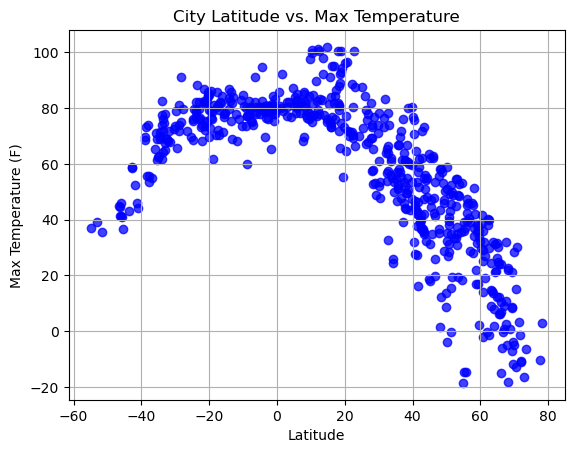

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'] , city_data_df['Max Temp'] , marker = "o", facecolors = "blue", alpha = .75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

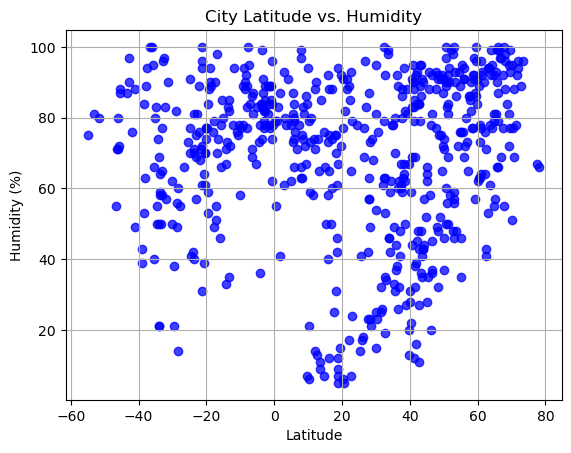

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'] , city_data_df['Humidity'] , marker = "o", facecolors = "blue", alpha = .75)


# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

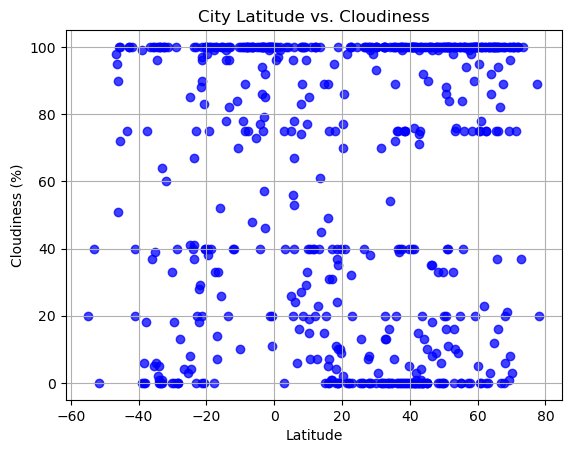

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'] , city_data_df['Cloudiness'] , marker = "o", facecolors = "blue", alpha = .75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

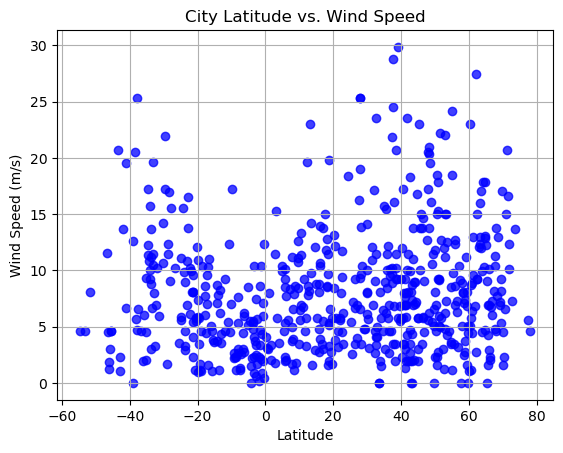

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'] , city_data_df['Wind Speed'] , marker = "o", facecolors = "blue", alpha = .75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df.loc[city_data_df["Lat"] >= 0, :]
northern_hemi_df = pd.DataFrame(northern_hemi)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Half Moon Bay,37.4636,-122.4286,53.37,60,100,21.85,US,1680009355
2,Butaritari,3.0707,172.7902,82.13,80,40,15.28,KI,1680009456
5,Bang Rakam,16.7585,100.1174,95.04,50,1,3.44,TH,1680009458
7,Mastic Beach,40.7668,-72.8521,44.11,91,100,3.44,US,1680009451
8,Albany,42.6001,-73.9662,39.92,84,99,1.99,US,1680009463


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df.loc[city_data_df["Lat"] < 0, :]
southern_hemi_df = pd.DataFrame(southern_hemi)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Talcahuano,-36.7167,-73.1167,55.08,100,100,4.61,CL,1680009455
3,Lebu,-37.6167,-73.6500,55.72,94,75,6.60,CL,1680009458
4,Cape Town,-33.9258,18.4232,74.12,50,1,10.00,ZA,1680009300
6,Mataura,-46.1927,168.8643,44.47,80,51,1.23,NZ,1680009461
9,Thaba-Tseka,-29.5220,28.6084,65.84,38,18,21.90,LS,1680009463


###  Temperature vs. Latitude Linear Regression Plot

Regression line equation is: y = -1.24x +99.23
The r-value is: 0.7506259395525129


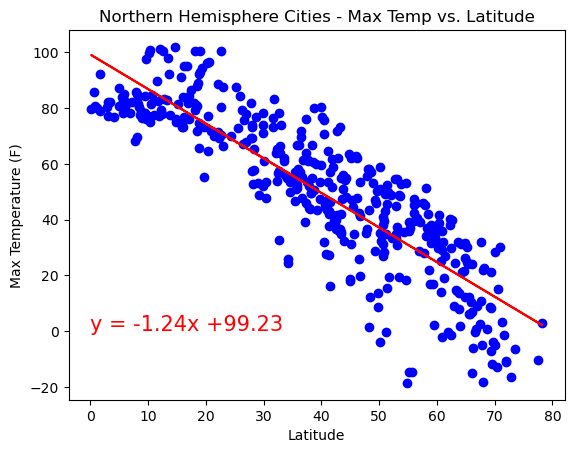

In [14]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, facecolor="blue")
plt.plot(x, regress_values ,"r-")
plt.title("Northern Hemisphere Cities - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig5.png")

Regression line equation is: y = 0.6x +85.73
The r-value is: 0.5004913439014476


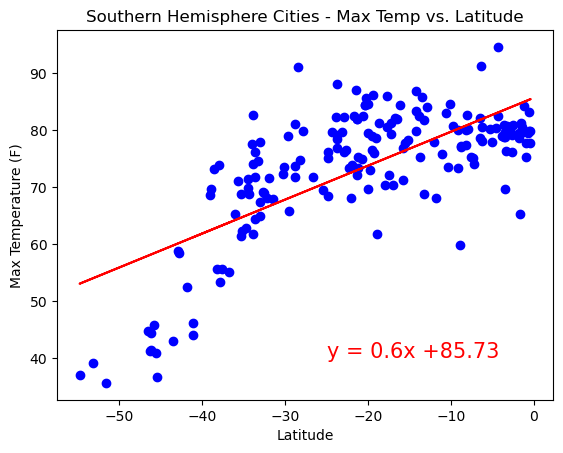

In [20]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, facecolor="blue")
plt.plot(x, regress_values ,"r-")
plt.title("Southern Hemisphere Cities - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig6.png")

**Discussion about the linear relationship:** There is a strong correlation between latitude and temperature. As latitude increases towards 0 in the southern hemisphere, temperatures rise. Conversely as latitude dcreases towards 0 in the northern hemisphere, temperature also decreases. 

### Humidity vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.34x +53.86
The r-value is: 0.07097992277529869


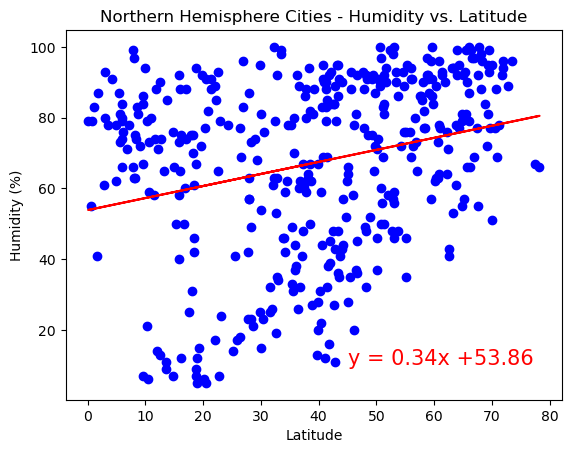

In [23]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, facecolor="blue")
plt.plot(x, regress_values ,"r-")
plt.title("Northern Hemisphere Cities - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig7.png")

Regression line equation is: y = 0.31x +79.49
The r-value is: 0.05784771433789241


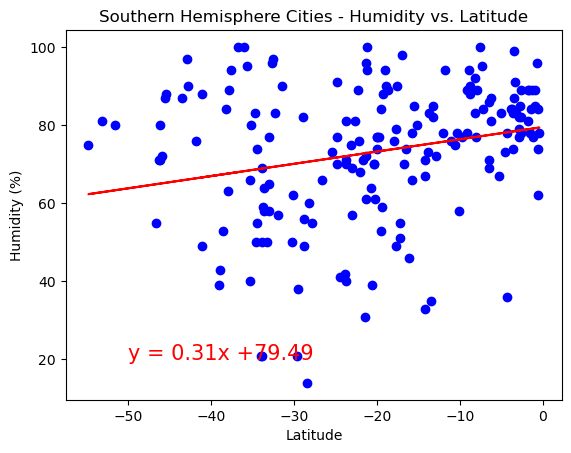

In [24]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, facecolor="blue")
plt.plot(x, regress_values ,"r-")
plt.title("Southern Hemisphere Cities - Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig8.png")

**Discussion about the linear relationship:** There is very little correlation between latitude and humity in either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.37x +43.5
The r-value is: 0.02869983138073034


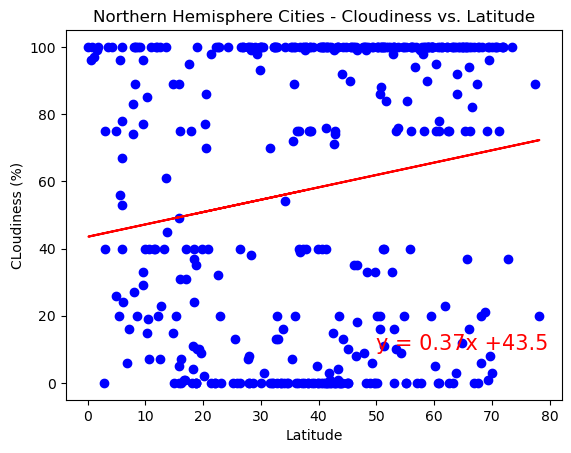

In [26]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, facecolor="blue")
plt.plot(x, regress_values ,"r-")
plt.title("Northern Hemisphere Cities - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('CLoudiness (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig9.png")

Regression line equation is: y = 0.94x +84.39
The r-value is: 0.11012133798161439


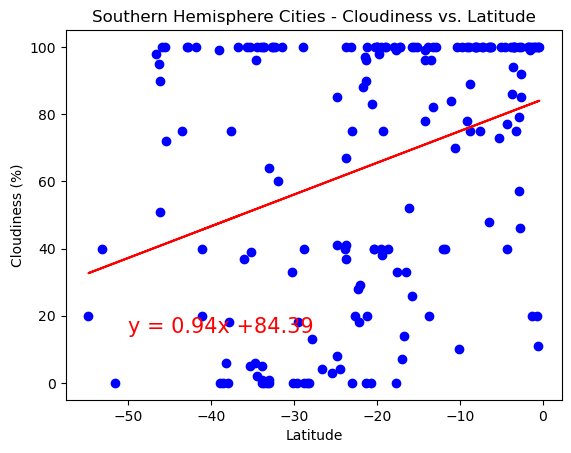

In [27]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, facecolor="blue")
plt.plot(x, regress_values ,"r-")
plt.title("Southern Hemisphere Cities - Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig10.png")

**Discussion about the linear relationship:** There is little to no correlation between cloudiness and latitude in either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

Regression line equation is: y = 0.03x +7.34
The r-value is: 0.008969840840114734


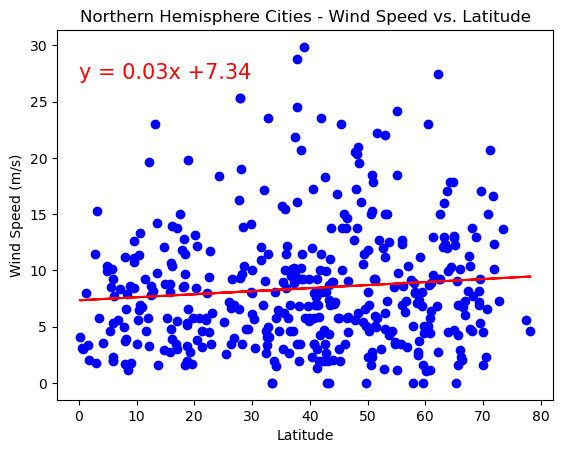

In [34]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, facecolor="blue")
plt.plot(x, regress_values ,"r-")
plt.title("Northern Hemisphere Cities - Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(0,27),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig11.png")

Regression line equation is: y = -0.12x +4.3
The r-value is: 0.11859915534712778


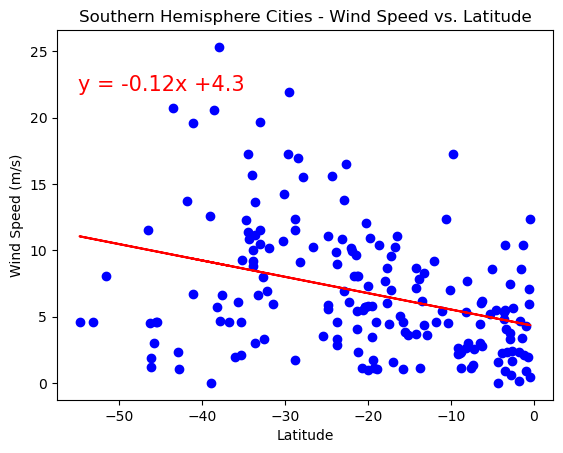

In [37]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")

plt.scatter(x, y, facecolor="blue")
plt.plot(x, regress_values ,"r-")
plt.title("Southern Hemisphere Cities - Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
plt.savefig("../output_data/Fig12.png")

**Discussion about the linear relationship:** There is no correlation between wind speed and latitude in northern hemisphere cities. There is little to no correlation in southern hemisphere cities.